In [9]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
# Connection details
server = 'DESKTOP-HS3JUB7\SQLEXPRESS'          # or your server name
database = 'SuperStore'       # your database name
# Create connection
conn = pyodbc.connect(
    f"DRIVER={{ODBC Driver 17 for SQL Server}};"
    f"SERVER={server};"
    f"DATABASE={database};"
      f"Trusted_Connection=yes;"
)
# Run query
query = "SELECT * FROM dbo.Store"
df = pd.read_sql(query, conn)
# Show results
df.head()


C:\Users\rasha\AppData\Local\Temp\ipykernel_18548\1162139464.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,4101.0,US-2021-102288,2021-06-19,2021-06-23,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Houston,...,77095.0,Central,OFF-AP-10004655,Office Supplies,Appliances,Holmes Visible Mist Ultrasonic Humidifier with...,2.264,1.0,0.8,-5.2072
1,4102.0,US-2021-102288,2021-06-19,2021-06-23,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Houston,...,77095.0,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1.0,0.8,-1.1100
2,4103.0,US-2021-102288,2021-06-19,2021-06-23,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Houston,...,77095.0,Central,OFF-PA-10000740,Office Supplies,Paper,Xerox 1982,146.176,8.0,0.2,47.5072
3,4104.0,CA-2021-137456,2021-12-21,2021-12-21,Same Day,RB-19465,Rick Bensley,Home Office,United States,Fremont,...,68025.0,Central,FUR-FU-10001940,Furniture,Furnishings,Staple-based wall hangings,15.920,2.0,0.0,7.0048
4,4105.0,US-2021-155999,2021-08-07,2021-08-13,Standard Class,JK-15370,Jay Kimmel,Consumer,United States,San Diego,...,92105.0,West,TEC-PH-10000439,Technology,Phones,GE DSL Phone Line Filter,159.960,5.0,0.2,17.9955


In [10]:
df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   float64       
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

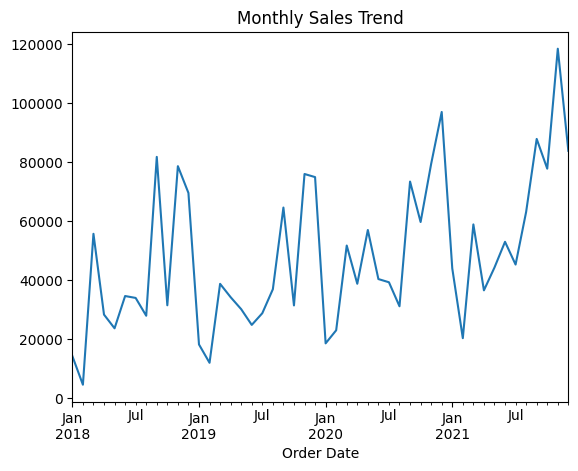

In [12]:
df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().plot(kind='line')
plt.title("Monthly Sales Trend"); plt.show()

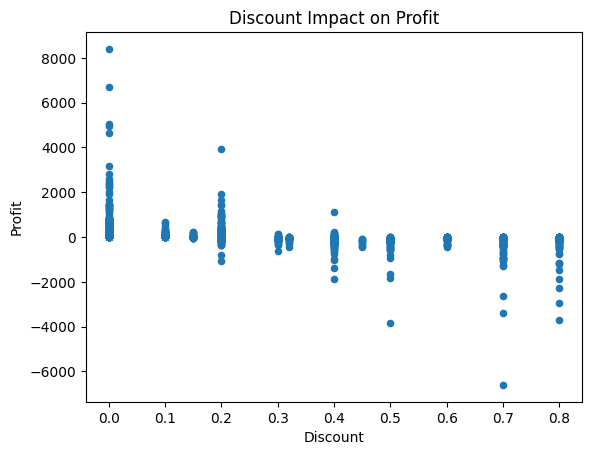

In [13]:
df.plot.scatter(x='Discount', y='Profit')
plt.title("Discount Impact on Profit"); plt.show()


In [14]:
df.groupby(df['Order Date'].dt.year)['Order ID'].nunique()


Order Date
2018     969
2019    1038
2020    1315
2021    1687
Name: Order ID, dtype: int64

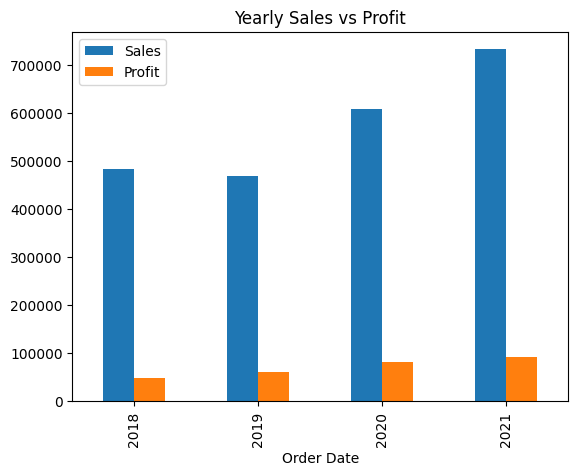

In [15]:
#Yearly Sales & Profit Trend
df.groupby(df['Order Date'].dt.year)[['Sales','Profit']].sum().plot(kind='bar')
plt.title("Yearly Sales vs Profit"); plt.show()


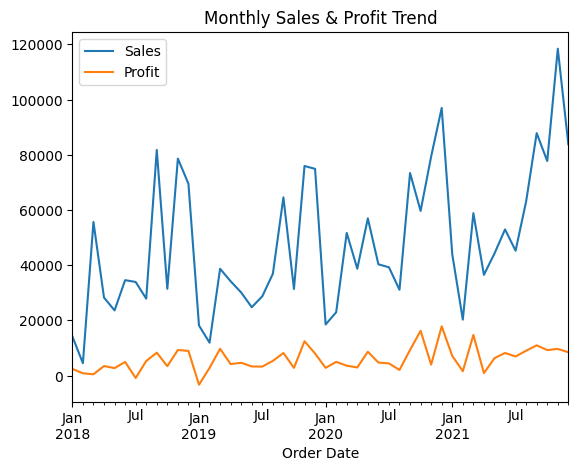

In [16]:
#Monthly Trend with Line Plot
df.groupby(df['Order Date'].dt.to_period('M'))[['Sales','Profit']].sum().plot()
plt.title("Monthly Sales & Profit Trend"); plt.show()


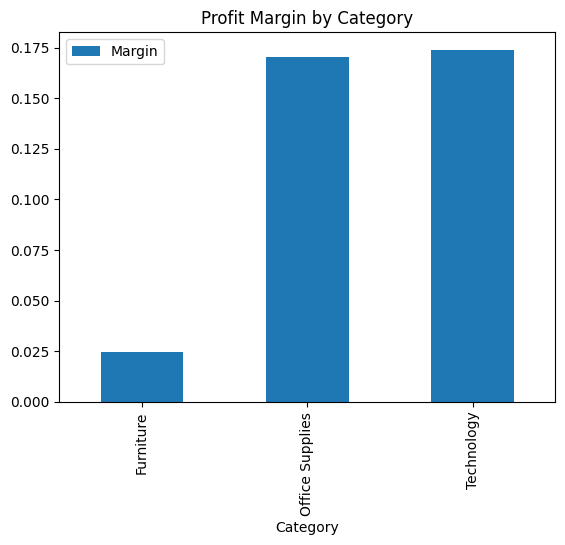

In [17]:
# Profit Margin by Category
(df.groupby('Category')[['Sales','Profit']].sum()
 .assign(Margin=lambda x: x['Profit']/x['Sales'])
 .plot(kind='bar', y='Margin'))
plt.title("Profit Margin by Category"); plt.show()


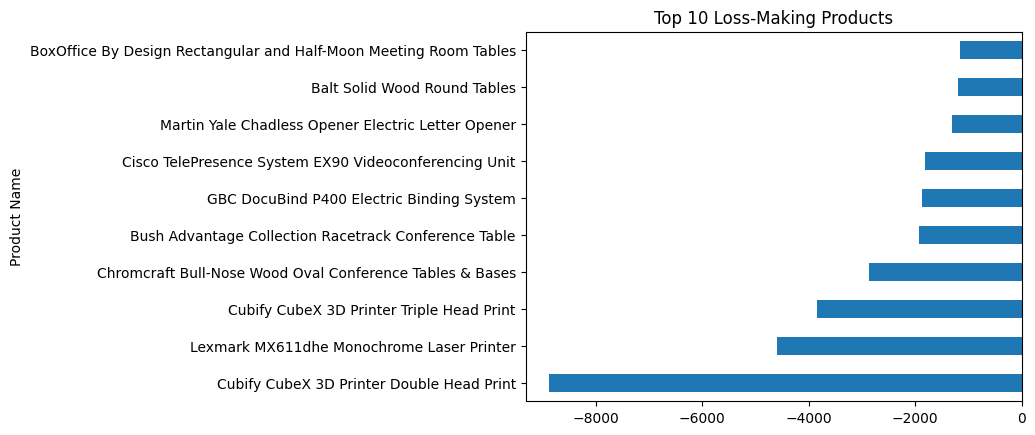

In [18]:
# Top 10 Products by Loss
loss = df.groupby('Product Name')['Profit'].sum().nsmallest(10)
loss.plot(kind='barh'); plt.title("Top 10 Loss-Making Products"); plt.show()


In [20]:
import  seaborn as sns 

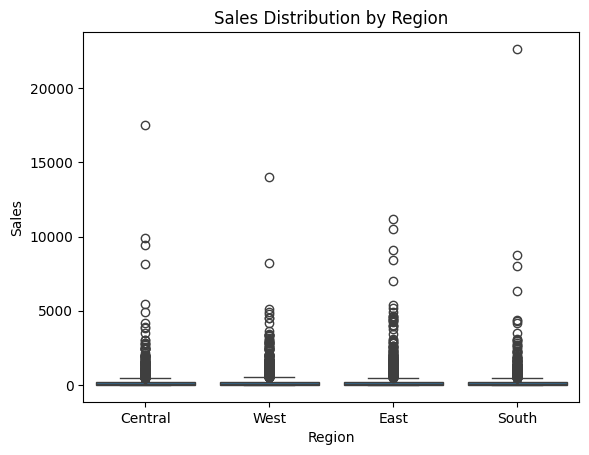

In [21]:
# Sales Distribution by Region
sns.boxplot(x='Region', y='Sales', data=df)
plt.title("Sales Distribution by Region"); plt.show()

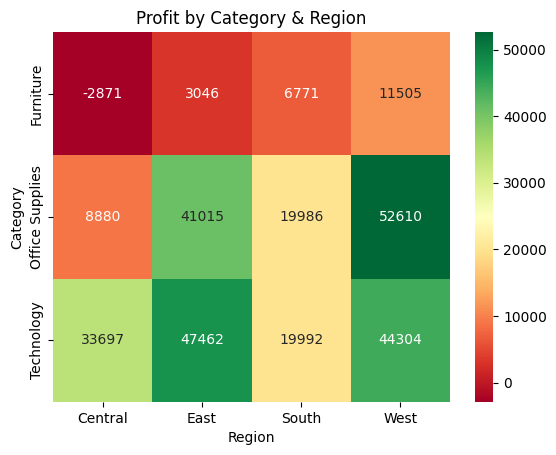

In [22]:
pivot = df.pivot_table(values='Profit', index='Category', columns='Region', aggfunc='sum')
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="RdYlGn")
plt.title("Profit by Category & Region"); plt.show()


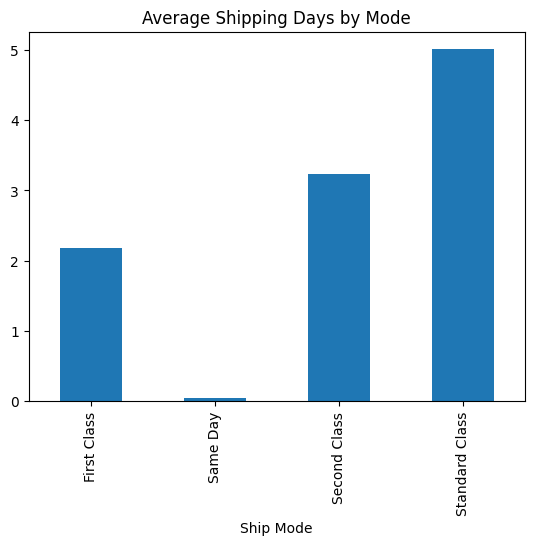

In [23]:
# Avg Shipping Days per Mode
df.assign(ShipDays=(df['Ship Date']-df['Order Date']).dt.days)\
  .groupby('Ship Mode')['ShipDays'].mean().plot(kind='bar')
plt.title("Average Shipping Days by Mode"); plt.show()
